<a href="https://colab.research.google.com/github/zihadbappy/bnfake/blob/main/BanFakeNews_mBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install -Uqq wandb


In [29]:
import wandb


In [30]:
wandb.login()

True

In [31]:

wandb.init(project="bn_fake_classification", entity="zihadbappy")

In [32]:
!git clone https://github.com/zihadbappy/FakeDatasets.git

fatal: destination path 'FakeDatasets' already exists and is not an empty directory.


In [33]:
import pandas as pd
Dataset= pd.read_csv('/content/FakeDatasets/banfakenews_no_duplicate.csv')

In [34]:
df = pd.DataFrame(Dataset)

In [35]:
df.groupby('label').agg('count')


,headline,content
label,,
0,1176,1176
1,1176,1175


In [36]:
df=df.dropna()

In [37]:
X=df.content
Y=df.label

In [38]:
Y.value_counts()

0    1176
1    1175
Name: label, dtype: int64

In [39]:
X.shape


(2351,)

In [40]:
!pip install -Uqq transformers datasets tqdm
!pip install -Uqq ohmeow-blurr

In [41]:
!pip install ohmeow-blurr -q

In [42]:
from fastai.text.all import *
from fastai.callback.wandb import *


from blurr.text.data.all import *


In [43]:
from blurr.text.modeling.all import *

In [44]:
from transformers import PreTrainedModel

In [45]:
from blurr.text.modeling.core import BlearnerForSequenceClassification

In [46]:
df['text']=df['content']

In [47]:
df = df.drop(['headline','content'],axis=1)

In [48]:
df.head()

,label,text
0,0,বিমান আকাশে খেয়াল শিশু পর্নোগ্রাফির অ্যাপ ডাউনলোড তাতেই মজে গিয়েছিলেন এক ভারতীয় পাইলট দিল্লি উড্ডয়ন বিমানটি সানফ্রান্সিসকোয় নামার সঙ্গেই যাত্রীদের হাতক়ড়া পরানো পাইলটকেএসময় মুম্বাইয়ের পাইলটকে গ্রেপ্তার পাসপোর্ট আটক বাতিল ভিসা পাইলটকে বিমানে দিল্লি পাঠানো হয়মুম্বাই বিমানবন্দর সূত্র বছর বয়সী পাইলট বিমানের ফার্স্ট অফিসার দিল্লি মুম্বাই বহুবার বিমান উড়িয়ে গিয়েছেন আমেরিকায়তবে দিনই পাইলটকে যুক্তরাষ্ট্রে ঢুকতে দেয়া মার্কিন ব্যুরো অব কাস্টমস অ্যান্ড বর্ডার প্রোটকশন্সশুধু একদিনের ঘটনার প্রেক্ষিতেই ভারতীয় পাইলটের বিরুদ্ধে ব্যবস্থা নেয়া নয়মুম্বাই বিমানবন্দর সূত্রের খবর গত মাস ধরেই প...
1,0,মিয়ানমারের রাখাইন বাংলাদেশে ছুটে আসা রোহিঙ্গা মুসলিমদের আশ্রয় দিয়ে নজির স্থাপনের প্রধানমন্ত্রী শেখ হাসিনা সারাবিশ্বে আলোচিত নির্যাতন রোহিঙ্গা অনুপ্রবেশকারীদের সার্বিক সহায়তাসহ মায়ার বন্ধনে আবদ্ধ করায় শেখ হাসিনাকে মানবতার প্রতীক হিসেবে বিশ্ব নেতারা একইসঙ্গে আওয়ামী লীগ সরকারের এমপিমন্ত্রীসহ নেতাকর্মীরাও মানবতার অনন্য উদাহরণ প্রধানমন্ত্রী শেখ হাসিনা দেশের জনগণের বিপদআপদে পাশে পেয়েছে হলেন শেখ হাসিনা সারাটা জীবনই কাটছে মানবতার সেবায় শুধুমাত্র রোহিঙ্গাদের পাশেই দেশের প্রতিটি জনগণের পাশে মানবতা আশ্রয় দাঁড়ান দেশের প্রাকৃতিক দুযোগ অসহায় মুহূর্তে শেখ হাসিনাকে পাশে পেয়েছে জনগণ আগামীতে একইভাবে প্রধানম...
2,0,তালগাছপুরের কানা বগির ছা স্পোর্টিং ক্লাব বার্ষিক ফুটবল প্রতিযোগিতায় চ্যাম্পিয়নশিপ রাখতে চায় রাম গরুড়ের ছানা স্পোর্টিং ক্লাব কোনভাবেই চ্যাম্পিয়ানশিপের ধারে আসতে পঁই পঁই কানা বগির ছা স্পোর্টিং ক্লাবের চেয়ারম্যানকানা বগির ছা স্পোর্টিং ক্লাবএর শক্তি বাড়াতে হাঁসজারু স্পোর্টিং ক্লাবের খেলোয়াড় দলে নেয়া তালগাছ পুরের মানুষ বছরে ফুটবল ম্যাচ দেখার উন্মুখ তালগাছপুর বাজারের দোকানে দোকানে মানুষ জড় হয়ে ফুটবল খেলা জল্পনা কল্পনা থাকেফুটবল ম্যাচ পরিচালনার অভিজ্ঞ রেফারি নিয়োগ দেয়া ফুটবল ম্যাচের সময় দর্শকদের হাতাহাতি গুঁতাগুঁতির ফুটবল পাগল এক লাইন্সম্যানের চোখ অন্ধ হয়ে যায় ফুটবলের গভীর অনুরাগের কারণে চোখ হারা...
3,0,রাতে পৃথিবীতে ধেয়ে আসছে ক্ষতিকর উচ্চ তেজস্ক্রিয়তাসম্পন্ন কসমিক রে মহাজাগতিক রশ্মি ক্ষতিকর রশ্মি রক্ষা পেতে রাত টা মিনিট টা মিনিট মোবাইল ফোন বন্ধ রাখুন শরীরের দূরে কোথাও রাখুন বিশ্বাস গুগল নাসা বিবিসির খবর অনুসন্ধান করুনএবং সংবাদটি বন্ধুবান্ধব প্রিয়জনকে জানান সামাজিক যোগাযোগ মাধ্যম ফেসবুকের ইনবক্সে হয়তো এরকম মেসেজ পেয়েছেন বিশ্বাস আতঙ্কিত হয়ে মেসেজটি প্রিয়জনকে ফরোয়ার্ড
4,0,স্কুলকলেজ বাসাবাড়ি অফিসেই অতি মানসিক চাপে গালি কথাই ঘটে মস্ত বড় কেলেঙ্কারি গবেষণা বলছে ভিন্ন কথা গবেষকদের দাবি গালিগালাজই কমাতে মানসিক চাপ স্বাস্থ্যের ভালোএকাধিক মার্কিন গবেষণায় প্রমাণ মিলেছে মানসিক চাপ অবসাদ মাত্রাতিরিক্ত উত্তেজনা কমানোর গালিগালাজ খুবই কার্যকর ভূমিকা পালন ধারণার একমত ব্রিটিশ গবেষক মনোবিজ্ঞানীরাওকেমব্রিজ বিশ্ববিদ্যালয়ের তাত্ত্বিক ফলিত ভাষাতত্ত্ব বিভাগের অধ্যাপক ড কিরিকুস অ্যান্টনিও জানান গালিগালাজ আসলে মন রাগ ক্ষোভ বের মানসিক চাপ কাটানোর সহজ উপায়অ্যান্টনিওর মতে যেসব মানুষ উত্তেজিত গালিগালাজ মানসিক অবসাদ উচ্চরক্তচাপ স্নায়বিক সমস্যা কখনো এসব ব্যক্তিদের দ্বৈত ব্যক্তিত্ব...


In [49]:
pretrained_model_name = "bert-base-multilingual-cased"
learn = BlearnerForSequenceClassification.from_data(df, pretrained_model_name, dl_kwargs={ 'bs': 4})

SuggestedLRs(minimum=3.311311302240938e-05, steep=0.12022644281387329, valley=0.00019054606673307717, slide=0.00363078061491251)

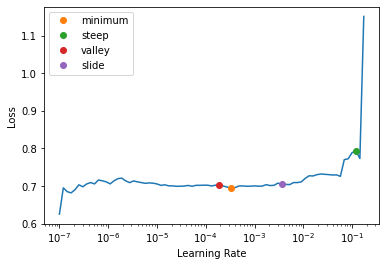

In [50]:
learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [51]:
#learn.unfreeze()
learn.fit_one_cycle(10, lr_max=1e-3,cbs=[WandbCallback(log_preds=False, log_model=False)])

Could not gather input dimensions


epoch,train_loss,valid_loss,f1_score,accuracy,time
0,0.638335,0.583117,0.781528,0.738298,02:19
1,0.372245,0.535017,0.831793,0.806383,02:19
2,0.356244,0.339500,0.871166,0.865957,02:19
3,0.377870,0.368353,0.862004,0.844681,02:19
4,0.253031,0.502054,0.838938,0.806383,02:19
5,0.249672,0.291320,0.902724,0.893617,02:19
6,0.190877,0.294736,0.888454,0.878723,02:19
7,0.166589,0.257459,0.912000,0.906383,02:19
8,0.107039,0.305664,0.898833,0.889362,02:19
9,0.092225,0.338927,0.897485,0.887234,02:19


In [52]:
learn.show_results(learner=learn, max_n=4,trunc_at=200)

,text,target,prediction
0,বছর ধরেই বাংলাদেশে সবচেয়ে ভয়াল মাদকের নাম ইয়াবা বাবা নামে সমাজের স্তরে তরুণদের মাঝে সারা দেশে ইয়াবার মূল যোগান আসে মুলত মায়ানমারের সীমান্তবর্তী বাংলাদেশের সর্বদক্ষিণের এলাকা টেকনাফ ইয়াবার সাথে জ,0,1
1,আহমেদের এলেবেলে বাংলা রম্য সাহিত্যে এক অনন্য সংযোজন শিরোনামের রচনাগুলো ছোট ভাই আহসান হাবীবের প্রকাশিত মাসিক উন্মাদের লিখা করলেও খবরের কাগজ কিছুমিছু বিচিত্রার সাপ্তাহিক মাসিক প্রকাশিত এরপর এলেবেলে নামে,0,0
2,অংশগ্রহণই কথা এমনটা হেরে সান্ত্বনা চিরকাল অংশই তাদেরকে সান্ত্বনা ভাষা আসন্ন নির্বাচনে পাননি মনঃকষ্টের বিপরীতে সান্ত্বনাও খুঁজে পাচ্ছেন করবেনমনের নানান জর্জরিত মানুষদের প্রাচীন ঠিকানা মনোরোগ বিশেষজ্ঞের,0,0
3,সংবিধান একাদশ সংসদ নির্বাচন ডিসেম্বরের শেষ প্রধানমন্ত্রী শেখ হাসিনা সভাসমাবেশে ঘোষণা ডিসেম্বরের শেষ সপ্তাহে নির্বাচন নির্বাচন কমিশন অক্টোবরের নির্বাচনের তফসিল ঘোষণা নির্বাচন এক মাস ধারণা এখনো বেশির ভা,1,1


In [53]:
wandb.finish()


accuracy,▁▄▆▅▄▇▇█▇▇
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_3,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
f1_score,▁▄▆▅▄█▇█▇▇
lr_0,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_1,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_2,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁
lr_3,▁▁▂▃▄▅▆▇▇██████▇▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁


In [54]:
!sudo apt-get install git-lfs


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
